# Causality and Experiments

### What if you can’t randomize?

In some situations it might not be possible to carry out a randomized controlled experiment. For instance, studying the effects of smoking during pregnancy poses ethical issues, as you cannot randomly assign pregnant women to a "smoking" group and expect compliance.

Thus, such research relies on observational studies rather than experiments.

# Simulation

**Simulation** is the process of using a computer to mimic a physical experiment.

TODO: pseudo-randomness in Computers

### Simulation 1: Coin Tosss

We want to simulate the outcomes of tosses of a coin. Each simulated value will be a Head or a Tail.

Tail    512
Head    488
Name: count, dtype: int64


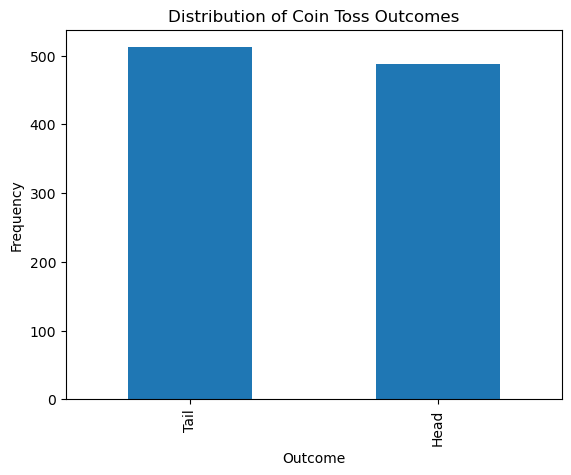

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the quantity to simulate (e.g., outcomes of coin tosses)
def coin_toss():
    return np.random.choice(['Head', 'Tail'])

# Step 2: Decide how many times to simulate the quantity (e.g., 1000 coin tosses)
num_repetitions = 1000

# Step 3: Create an empty list to collect simulated values
outcomes = []

# Use a for loop to simulate one value for each repetition and collect the results
for _ in range(num_repetitions):
    outcome = coin_toss()
    outcomes.append(outcome)

# Step 4: Analyze the results
# Count the occurrences of "Head" and "Tail"
counts = pd.Series(outcomes).value_counts()

# Print the counts
print(counts)

# Visualize the distribution
counts.plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Coin Toss Outcomes')
plt.show()

### Sumulation 2: Number of Heads in a 100-Tosses Experiment

The quantity we are going to simulate is the number of heads in 100 tosses.



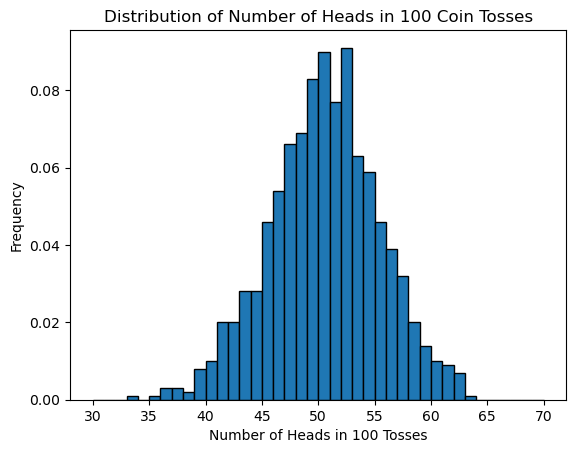

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the quantity to simulate (number of heads in 100 tosses)
def simulate_one_set_of_tosses(num_tosses=100):
    """Simulate 100 coin tosses and count the number of heads."""
    # Simulate coin tosses: 1 represents Head, 0 represents Tail
    tosses = np.random.choice([0, 1], size=num_tosses)
    # Count the number of heads (1s)
    num_heads = np.sum(tosses)
    return num_heads

# Step 2: Decide how many times to simulate the quantity (e.g., 1000 repetitions)
num_repetitions = 1000

# Step 3: Create an empty list to collect simulated values
outcomes = []

# Use a for loop to simulate the number of heads for each set of 100 tosses
for _ in range(num_repetitions):
    outcome = simulate_one_set_of_tosses()
    outcomes.append(outcome)

# Convert the collection array to a numpy array for further analysis
outcomes = np.array(outcomes)

# Step 4: Analyze the results
# Plot a histogram of the number of heads
plt.hist(outcomes, bins=range(30, 71), edgecolor='black', density=True)
plt.xlabel('Number of Heads in 100 Tosses')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Heads in 100 Coin Tosses')
plt.show()

## Big Data

- The most important thing in data science is the **question**
- The second most important is the **data**
- Often the data will limit or enable the questions
- But having data can't save you if you don't have a question
- Big or small, you need the right data

### The Law of Large Numbers

The use of large random samples is justified by the **Law of Large Numbers**, which states that the empirical distribution of a large random sample converges to the true distribution of the population from which the sample was drawn.

A ***statistic*** is any number computed using the data in a sample. The sample median, therefore, is a statistic.



## Statistical Bias

When a process produces errors that are systematically in one direction – such as the percentage of Black panelists always being lower than expected – then data scientists say the process is biased. Quantification of such bias is an important responsibility of data science.

<img src="https://inferentialthinking.com/_images/1987144aec92074d032cbc1062fa1d83f135a25f56222cdc9eae59f826939dec.png" width="400">

Image Source: https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html#statistical-bias

## Distance Between Two Distributions

We develop a technique that helps us decide whether one distribution (observed distribution) looks like a random sample from another (unbiased). This is to verify the claim that a process of selection was indeed random.

The statistic we want to compute is **Total Variation Distance (TVD)** between two distributions. We know how to measure how different two numbers are: if the numbers are $x$ and $y$, the distance between them is $|x - y|$. Now we have to quantify the distance between two distributions.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwyP1uKlnoaIyfUS0LzQcLZ-WuGL56SzjG3A&s">

Figure: Total variation distance is half the absolute area between the two curves: Half the shaded area above.

 For example, we have to measure the distance between the blue and gold distributions below.

<img src="https://inferentialthinking.com/_images/4d10788852cacb74b5fbd928a9112bf70573d7546085538c8e44ebcf22756cea.png" width="500">

| Ethnicity  | Eligible | Panels | Difference |
|------------|----------|--------|------------|
| Asian/PI   | 0.15     | 0.26   | 0.11       |
| Black/AA   | 0.18     | 0.08   | -0.1       |
| Caucasian  | 0.54     | 0.54   | 0          |
| Hispanic   | 0.12     | 0.08   | -0.04      |
| Other      | 0.01     | 0.04   | 0.03       |

Take a look at the column `Difference` and notice that the sum of its entries is 0: the positive entries add up to 0.14, exactly canceling the total of the negative entries which is -0.14.

This is numerical evidence of the fact that in the bar chart, the gold bars exceed the blue bars by exactly as much as the blue bars exceed the gold. The proportions in each of the two columns `Panels` and `Eligible` add up to 1, and so the give-and-take between their entries must add up to 0.

To avoid the cancellation, we drop the negative signs and then add all the entries. But this gives us two times the total of the positive entries (equivalently, two times the total of the negative entries, with the sign removed). We don’t need that doubling, so we divide the sum by 2.



### P-value

The concept of statistical significance, widely adopted across disciplines, traces its origins to Sir Ronald Fisher's work in the early 20th century. Fisher suggested the 5% level as a convenient threshold for determining significance in hypothesis testing, though he acknowledged other possible thresholds like 2% or 1%.

## THE PERMUTATION TEST

See: https://www.jwilber.me/permutationtest/

### Percentiles

Let $p$ be a number between 0 and 100. The $p$-th percentile of a collection is the smallest value in the collection that is at least as large as $p%$ of all the values.

By this definition, any percentile between 0 and 100 can be computed for any collection of values, and it is always an element of the collection.

In practical terms, suppose there are $n$ elements in the collection. To find the $p$-th percentile:

- Sort the collection in increasing order.
- Find $p$% of $n$: $k = (p/100) \times n$.
- If $k$ is an integer, take the $k$th element of the sorted collection.
- If $k$ is not an integer, round it up to the next integer, and take that element of the sorted collection.

## The Bootstrap: Resampling from the Sample

... Fortunately, a brilliant idea called the bootstrap can help her out. Since it is not feasible to generate new samples from the population, the bootstrap generates new random samples by a method called resampling: the new samples are drawn at random from the original sample.

In this section we are going to pretend we don’t know the value, and see how well we can estimate it based on a random sample. In later sections, we will come down to earth and work in situations where the parameter is unknown. For now, we are all-knowing.

**Unbiased Estimate**: An estimator (like the sample mean) is said to be unbiased if the expected value (the average value across many samples) of the estimator equals the parameter it estimates (the population mean). Mathematically, this can be expressed as:

$$E(\bar{x}) = \mu$$

where $\bar{x}$ is the sample mean and $\mu$ is the population mean.

Because the sample mean is based on random sampling, it doesn’t systematically overestimate or underestimate the population mean. Over many samples, any deviations above or below the population mean balance out.